# Task 1: Read the image and display the result after edge detection: Gx, Gy, and G.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance
from scipy import ndimage, spatial
 

In [28]:
dir_monhoc = "/content/drive/MyDrive/CS231.N22.KHCL"
dir_baitap = os.path.join(dir_monhoc, "Baitap", 'Baitap2')
dir_images = os.path.join(dir_baitap,"images")

In [29]:
path_bicycle = os.path.join(dir_images,'Bicycle.jpg')
path_houseg = os.path.join(dir_images,'houseg.bmp')

In [30]:
img_bicycle = cv.imread(path_bicycle)
img_houseg = cv.imread(path_houseg)
print(img_bicycle.shape)
print(img_houseg.shape)

(200, 267, 3)
(256, 256, 3)


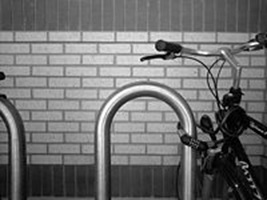

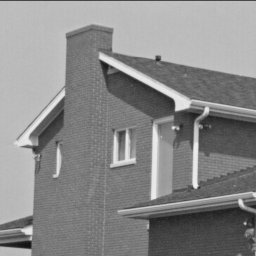

In [31]:
cv2_imshow(img_bicycle)
cv2_imshow(img_houseg)

In [41]:
def sobel_filters(img_bicycle):
  Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
  Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

  Ix = cv.filter2D(img_bicycle, -1, Sx)
  Iy = cv.filter2D(img_bicycle, -1, Sy)

  G=np.hypot(Ix,Iy)
  G=G/G.max()*255
  theta=np.arctan2(Iy,Ix)

  return Ix,Iy,G,theta

In [33]:
def show2image(img_src, img_rst, title1, title2):
    plt.figure(figsize=(20, 20))

    #show img src
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img_src = cv.cvtColor(img_src.astype(np.uint8), cv.COLOR_BGR2RGB)
    plt.imshow(img_src, interpolation='bicubic')

    #show img result
    plt.subplot(1, 2, 2)
    plt.title(title2)
    img_rst = cv.cvtColor(img_rst.astype(np.uint8), cv.COLOR_BGR2RGB)
    plt.imshow(img_rst, interpolation='bicubic')

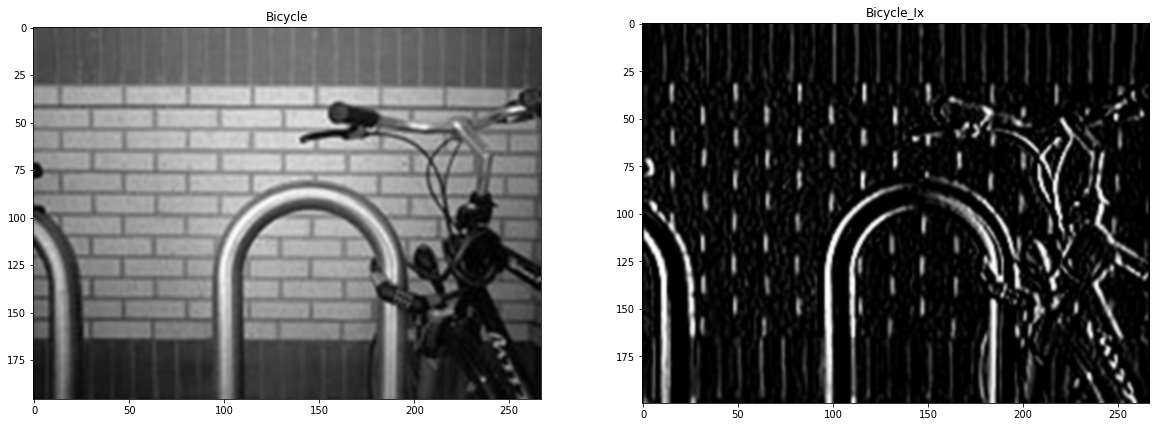

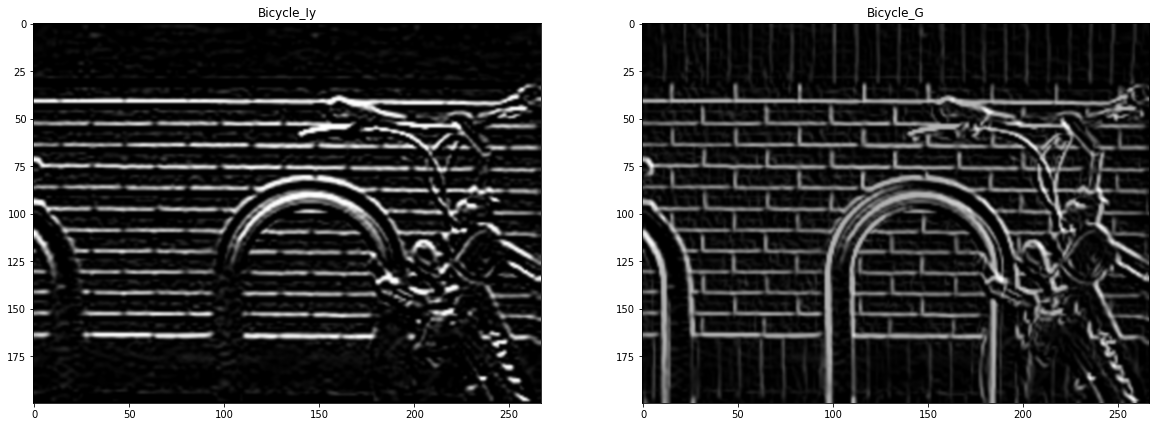

In [42]:
Ix, Iy, G, theta = sobel_filters(img_bicycle)
img_bicycle = img_bicycle[:-4]
show2image(img_bicycle, Ix, 'Bicycle', 'Bicycle_Ix')
show2image(Iy, G, 'Bicycle' + '_Iy', 'Bicycle_G')

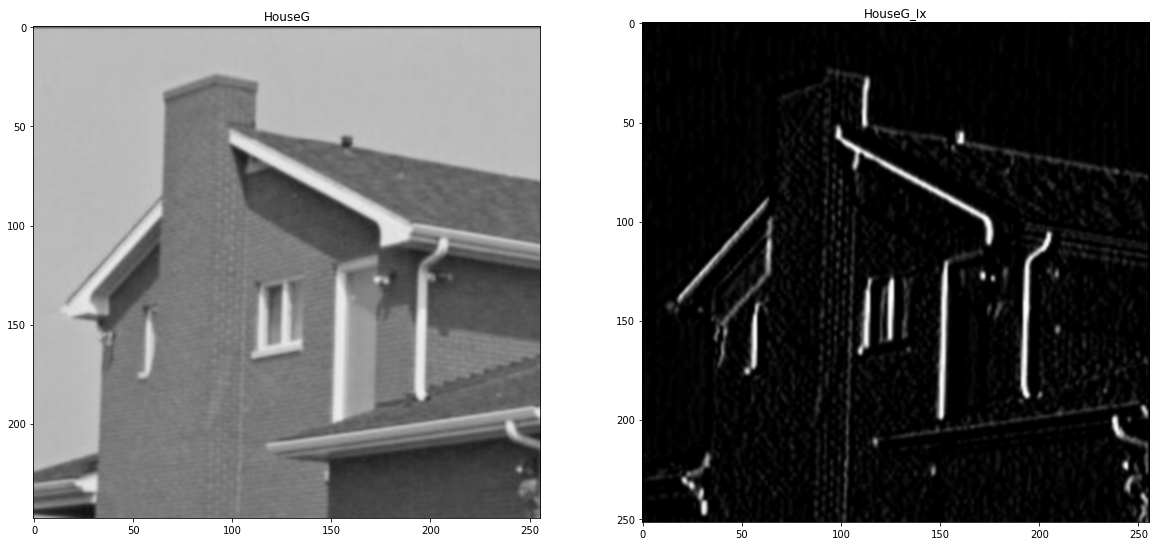

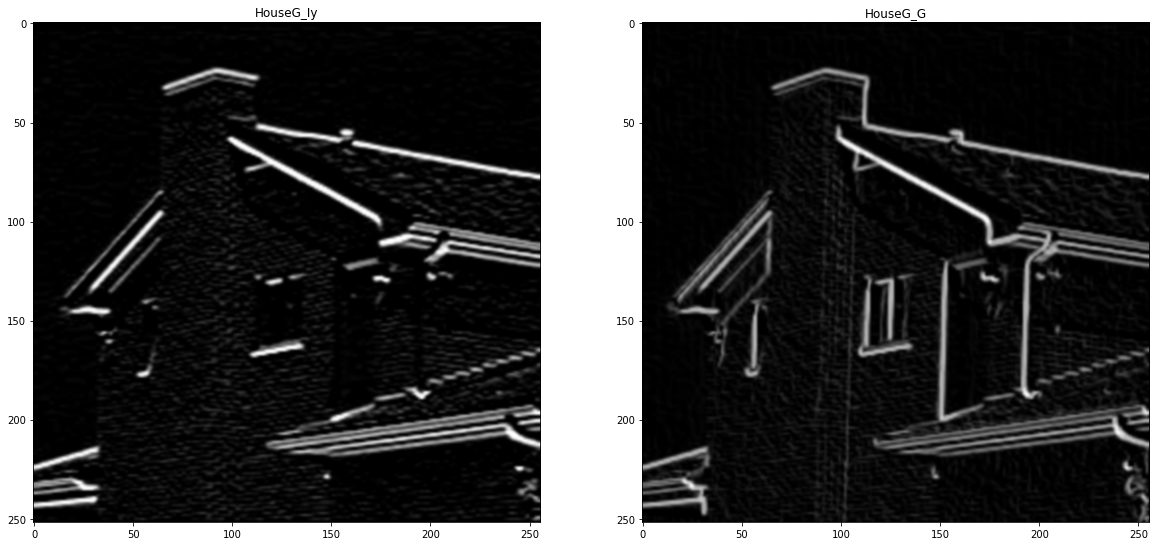

In [44]:
Ix, Iy, G, theta = sobel_filters(img_houseg)
img_houseg = img_houseg[:-4]
show2image(img_houseg, Ix, 'HouseG', 'HouseG_Ix')
show2image(Iy, G, 'HouseG' + '_Iy', 'HouseG_G')


# Task 2: Read 2 images
Write a function to extract image features based on edge information: along the x-axis and y-axis.

Calculate the Euclidean distance between the 2 images: using the scipy library.

Calculate the cosine similarity between the 2 images.

In [53]:
path_14 = cv.imread(os.path.join(dir_images,'image_0814.jpg'),0)
path_16 = cv.imread(os.path.join(dir_images,'image_0816.jpg'),0)
path_48 = cv.imread(os.path.join(dir_images,'image_1248.jpg'),0)

In [51]:
def calFeartureVector(img_src):
    img_dst = img_src.copy()
    img_dst = cv.resize(img_dst, (256, 256))
    Ix, Iy, G, theta = sobel_filters(img_dst)

    feature = []
    for i in range(G.shape[0]):
        tmp = 0
        for j in range(G.shape[1]):
            tmp = tmp + G[i,j]
        feature.append(tmp)

    for j in range(G.shape[1]):
        tmp = 0
        for i in range(G.shape[0]):
            tmp = tmp + G[i,j]
        feature.append(tmp)
    return feature

In [64]:
feature1 = calFeartureVector(path_14)
feature2 = calFeartureVector(path_16)
feature3 = calFeartureVector(path_48)

In [65]:
print("Euclidean distance between image 14 and 16:", distance.euclidean(feature1, feature2))
print("Euclidean distance between image 14 and 48:", distance.euclidean(feature1, feature3))

Khoảng cách euclidean giữa 2 ảnh 14 và 16: 55432.88078311733
Khoảng cách euclidean giữa 2 ảnh 14 và 48: 92123.37554385341


In [63]:
print("Cosine similarity between image 14 and 16: ", 1 - spatial.distance.cosine(feature1, feature2))
print("Cosine similarity between image 14 and 48:", 1 - spatial.distance.cosine(feature1, feature3))

Sự tương đồng theo cosin giữa 2 ảnh 14 và 16:  0.9403013260778474
Sự tương đồng theo cosin giữa 2 ảnh 14 và 48: 0.8133452847890964
